# Import lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Đọc dữ liệu

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Khám phá dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Biểu đồ 2 thuộc tính SkinThickness và Insulin

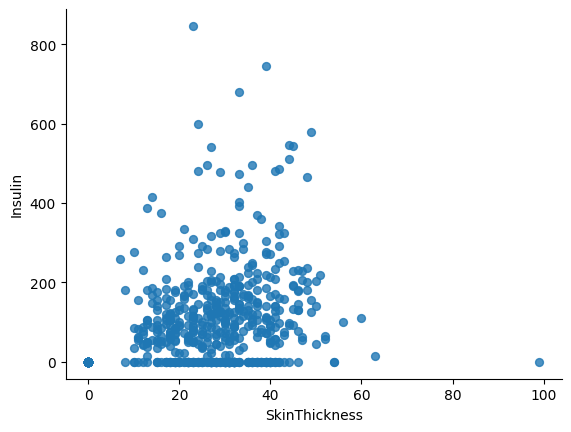

In [ ]:
df.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Biểu đồ 2 thuộc tính SkinThickness và BloodPressure

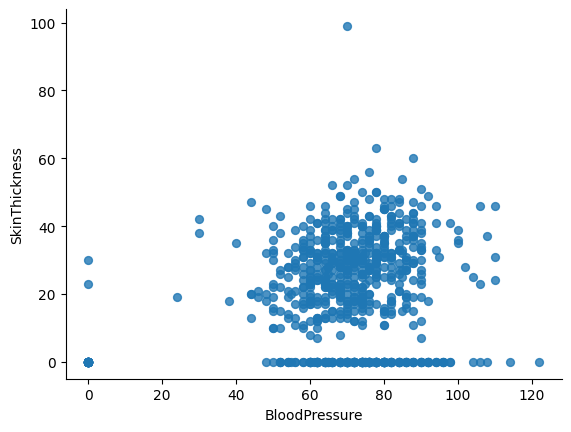

In [ ]:
df.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Biểu đồ 2 thuộc tính BloodPressure và Glucose

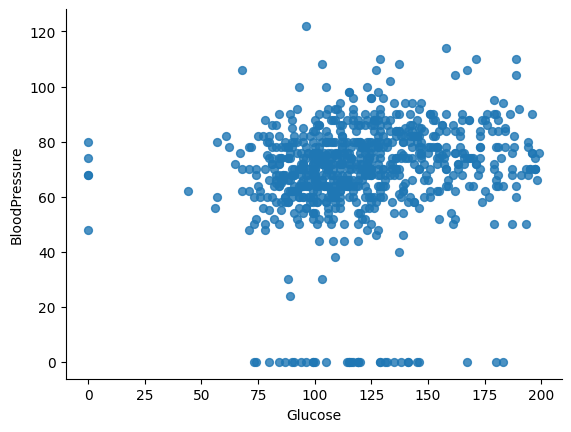

In [ ]:
df.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Biểu đồ 2 thuộc tính Glucose và Pregnancies

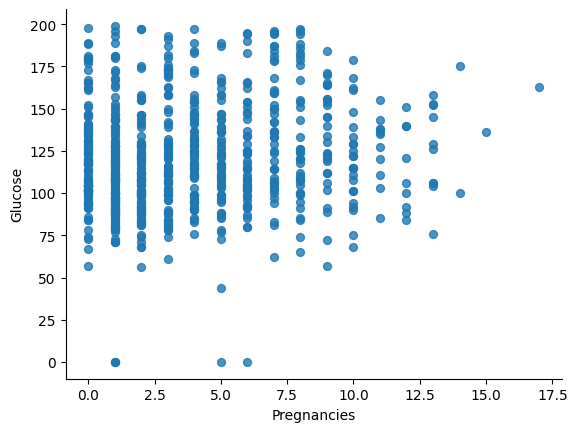

In [ ]:
df.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Hiển thị số lượng mẫu của nhãn

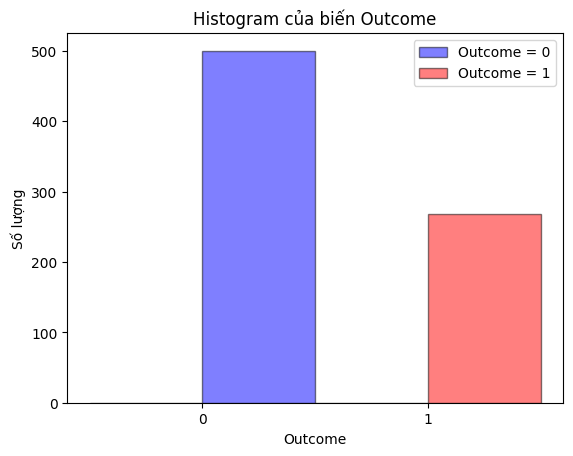

,count
Outcome,
0,500
1,268


In [ ]:
plt.hist(df[df['Outcome'] == 0]['Outcome'], bins=2, color='blue', label='Outcome = 0', alpha=0.5, edgecolor='black')
plt.hist(df[df['Outcome'] == 1]['Outcome'], bins=2, color='red', label='Outcome = 1', alpha=0.5, edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Số lượng')
plt.title('Histogram của biến Outcome')
plt.xticks([0, 1])
plt.legend()
plt.show()
df['Outcome'].value_counts()

Biểu đồ tỉ lệ phần trăm của nhãn Outcome

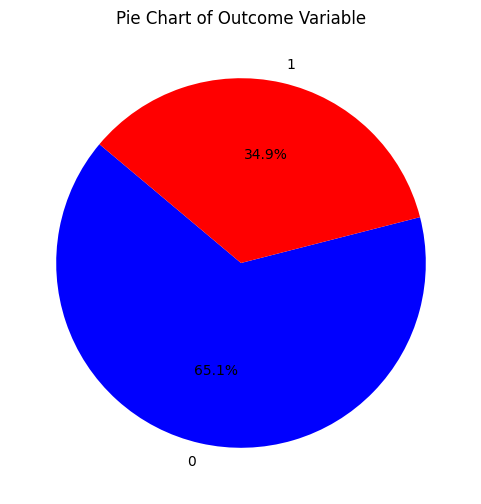

In [ ]:
counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Pie Chart of Outcome Variable')
plt.show()

Truy xuất các đặc trưng

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Histograms cho từng đặc trưng

Tần suất của Pregnancies trong từng khoảng:
Pregnancies
(0.0, 1.7]      135
(1.7, 3.4]      178
(3.4, 5.1]      125
(5.1, 6.8]       50
(6.8, 8.5]       83
(8.5, 10.2]      52
(10.2, 11.9]     11
(11.9, 13.6]     19
(13.6, 15.3]      3
(15.3, 17.0]      1
Name: count, dtype: int64

Tần suất của Glucose trong từng khoảng:
Glucose
(0.0, 19.9]         0
(19.9, 39.8]        0
(39.8, 59.7]        4
(59.7, 79.6]       32
(79.6, 99.5]      156
(99.5, 119.4]     211
(119.4, 139.3]    163
(139.3, 159.2]     95
(159.2, 179.1]     56
(179.1, 199.0]     46
Name: count, dtype: int64

Tần suất của BloodPressure trong từng khoảng:
BloodPressure
(0.0, 12.2]         0
(12.2, 24.4]        1
(24.4, 36.6]        2
(36.6, 48.8]       13
(48.8, 61.0]      108
(61.0, 73.2]      260
(73.2, 85.4]      243
(85.4, 97.6]       87
(97.6, 109.8]      14
(109.8, 122.0]      5
Name: count, dtype: int64

Tần suất của SkinThickness trong từng khoảng:
SkinThickness
(0.0, 9.9]        4
(9.9, 19.8]     107
(19.8, 29.7]   

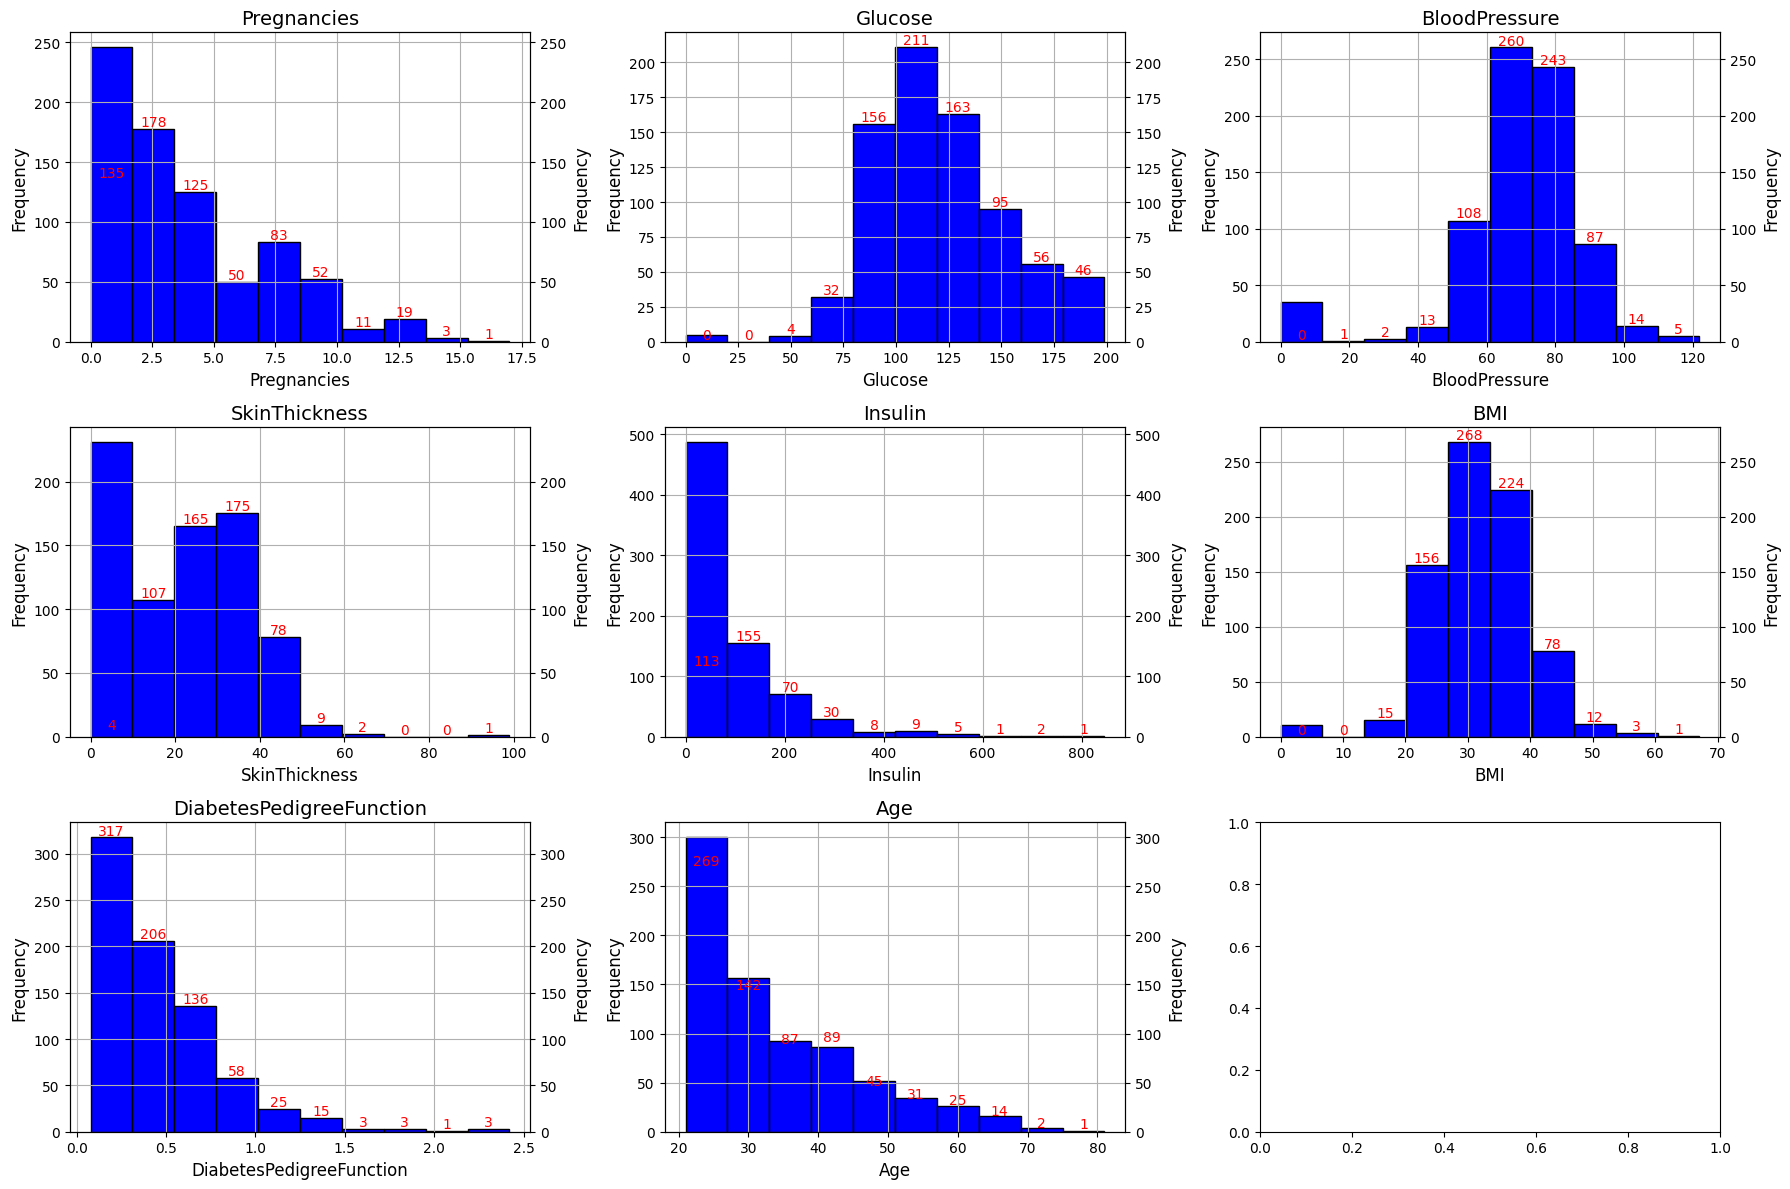

In [ ]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Số lượng bins (khoảng) muốn chia cho mỗi đặc trưng
number_of_bins = 10

# Tạo một plot tổng thể cho các biểu đồ histogram
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Tạo khoảng (bins) và tính toán tần suất
    bins = np.linspace(df[feature].min(), df[feature].max(), number_of_bins + 1)
    binned_data = pd.cut(df[feature], bins=bins)
    frequency = binned_data.value_counts().sort_index()

    # In ra các tần suất
    print(f'Tần suất của {feature} trong từng khoảng:')
    print(frequency)
    print()

    # Vẽ biểu đồ histogram
    ax = axes[i]
    df[feature].hist(ax=ax, bins=bins, edgecolor='black', color='blue')
    ax.set_title(f'{feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Vẽ trục y thứ hai cho tần suất
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_ylabel('Frequency', fontsize=12)

    # Hiển thị tần suất
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for bin_center, freq in zip(bin_centers, frequency):
        ax2.text(bin_center, freq, str(freq), ha='center', va='bottom', fontsize=10, color='red')
plt.tight_layout()
plt.show()

Biểu đồ boxplot cho từng đặc trưng

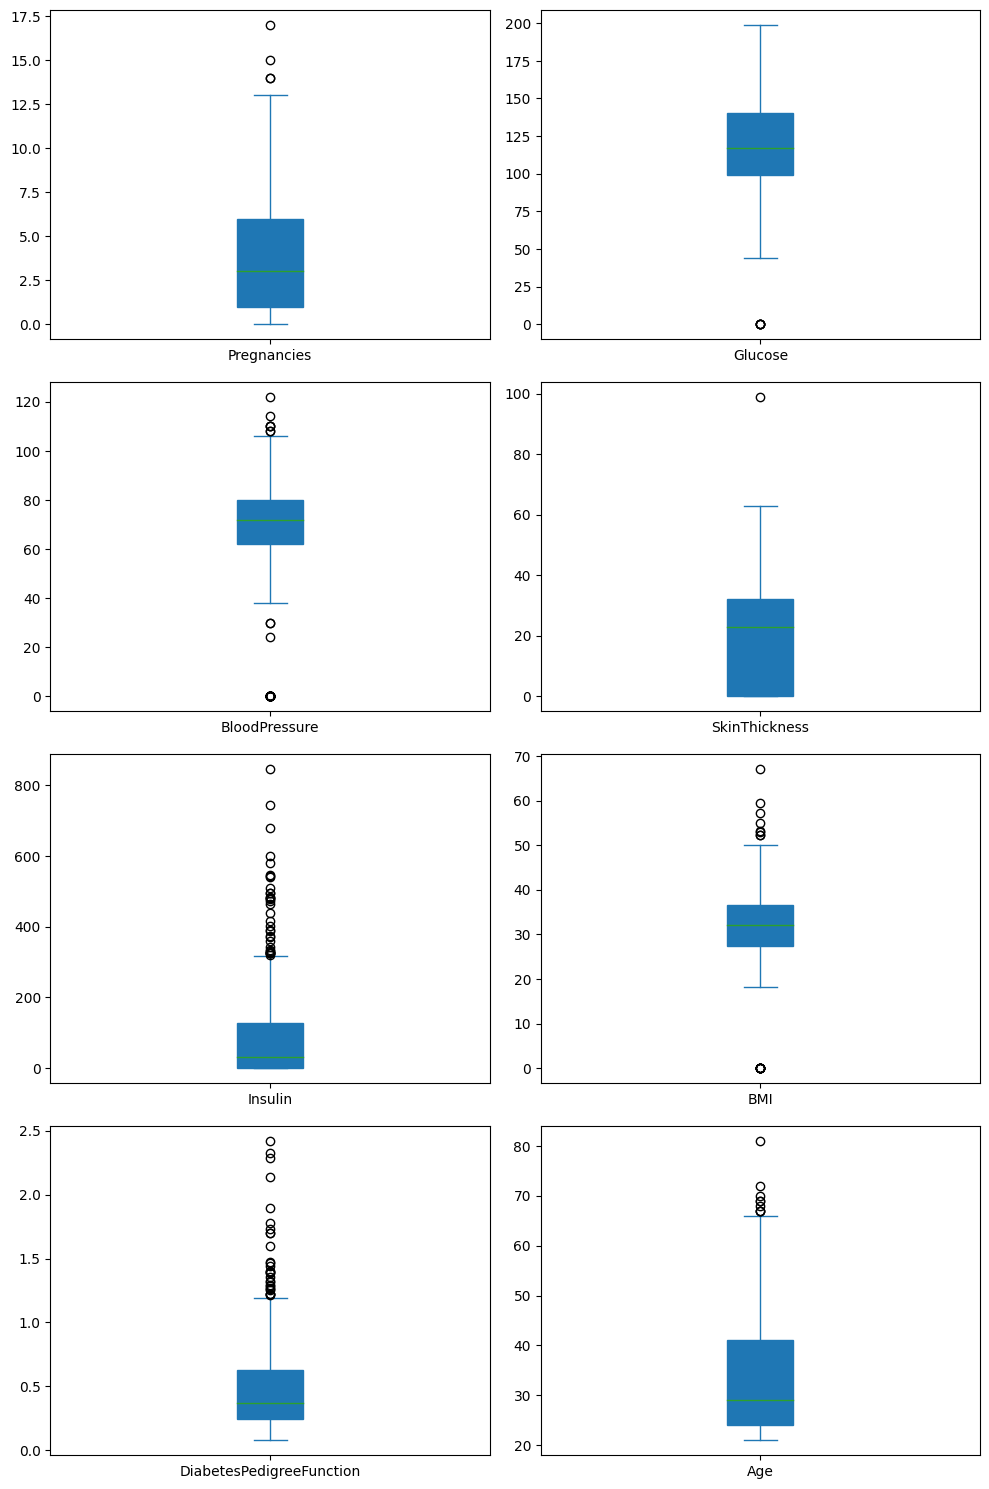

In [ ]:
# Danh sách các giá trị numerical
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Vẽ biểu đồ hộp cho mỗi numerical (tính năng số)
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 15), patch_artist=True)
plt.tight_layout()
plt.show()

Biểu đồ boxplot so sánh giá trị của các đặc trưng số với nhãn

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


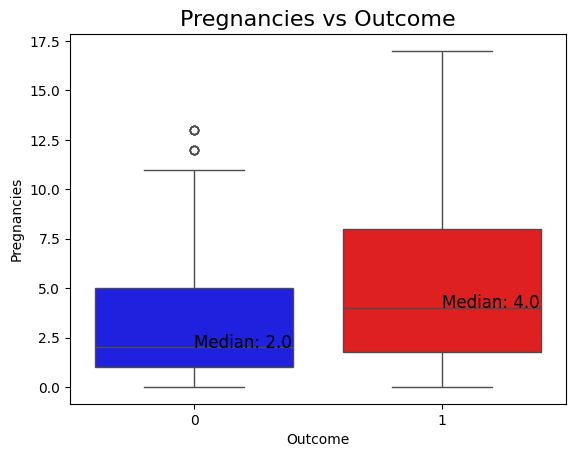

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


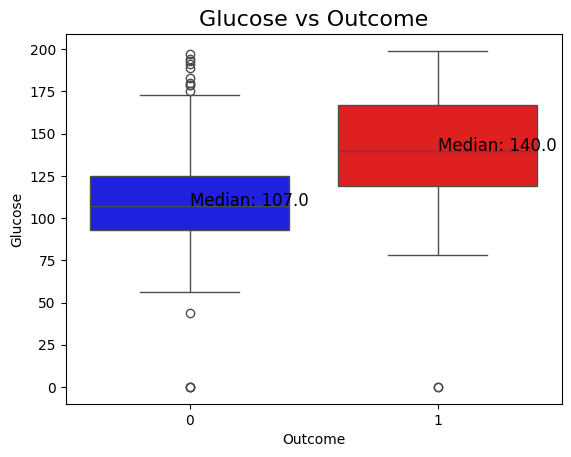

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


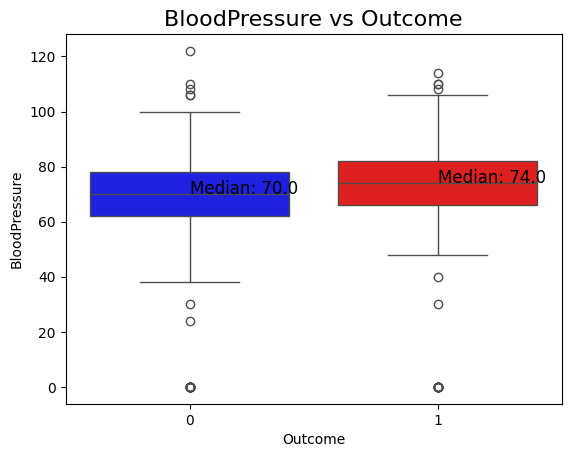

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


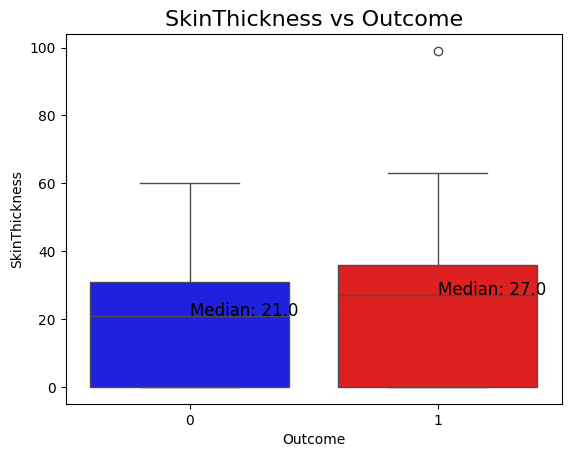

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


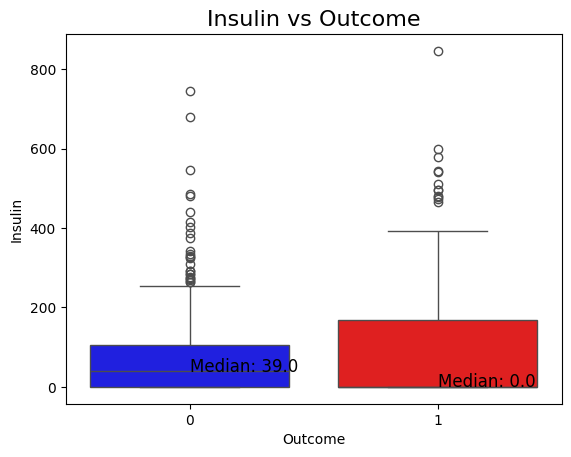

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


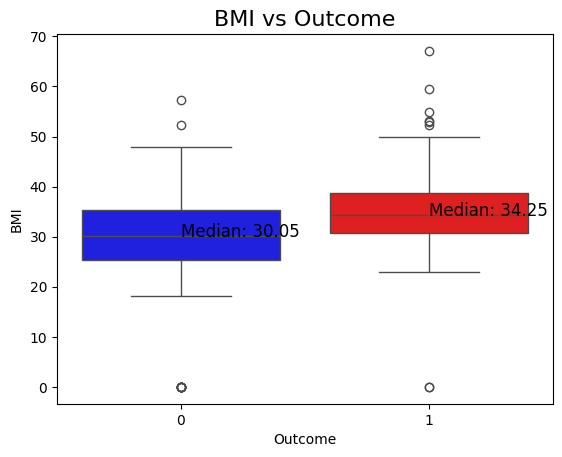

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


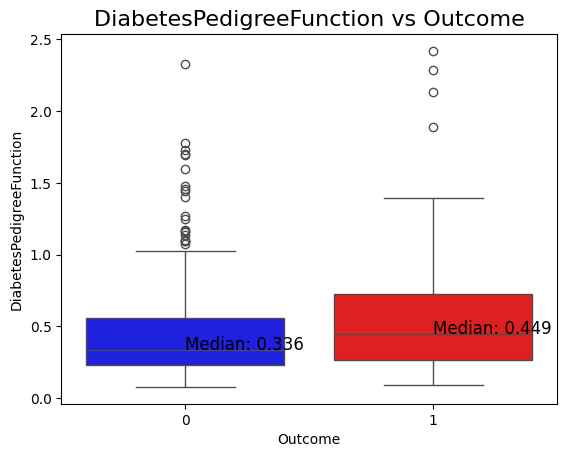

<ipython-input-19-de3b7f4d35a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str


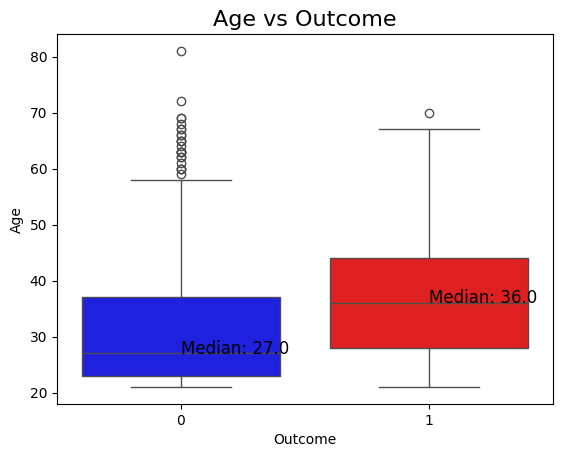

In [19]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Bảng màu cho hộp biểu đồ boxplot
# my_pal = {0: "blue", 1: "red"} # int
my_pal = {"0": "blue", "1": "red"} # str

for feature in numerical_features:
    # Vẽ boxplot
    # sns.boxplot(x='Purchased', y=feature, data=df, hue='Purchased', palette=my_pal, dodge=False) # int
    sns.boxplot(x='Outcome', y=feature, data=df, palette=my_pal) # str

    # Tính toán và hiển thị trung vị
    median_0 = df[df['Outcome'] == 0][feature].median()
    median_1 = df[df['Outcome'] == 1][feature].median()
    plt.text(0, median_0, f'Median: {median_0}', color='black', ha='left', fontsize=12)
    plt.text(1, median_1, f'Median: {median_1}', color='black', ha='left', fontsize=12)
    # Đặt tiêu đề cho biểu đồ
    plt.title(f'{feature} vs Outcome', fontsize=16)
    # Hiển thị biểu đồ
    plt.show()


Ma trận tương quan (Corelation Matrix)

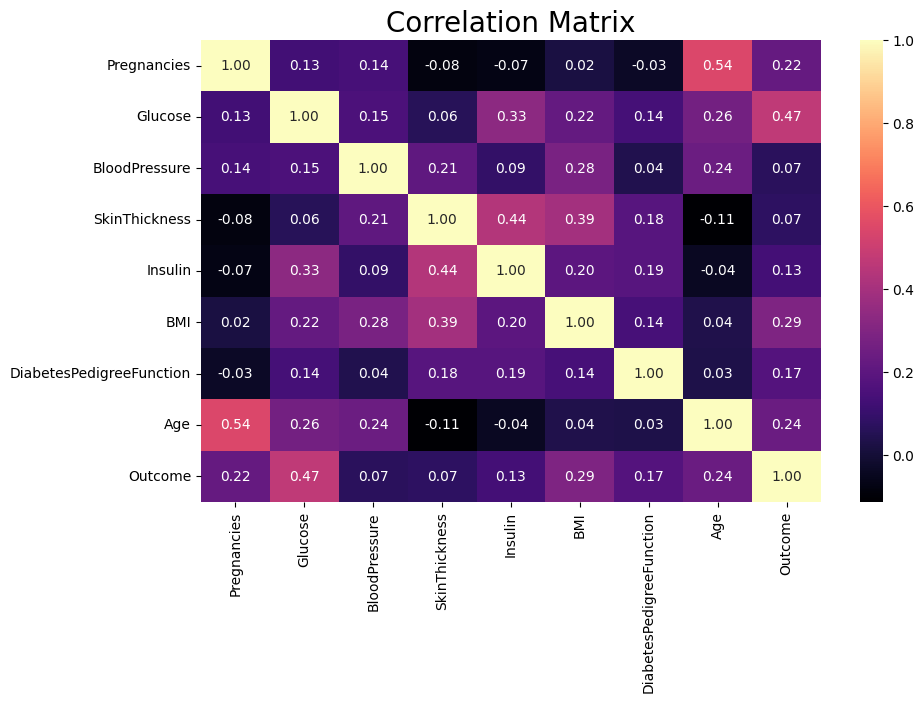

In [ ]:
# Correlation matrix
f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()